<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Display-Settings" data-toc-modified-id="Display-Settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Display Settings</a></span></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Load-Data-Set" data-toc-modified-id="Load-Data-Set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load Data Set</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#USER_ID" data-toc-modified-id="USER_ID-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>USER_ID</a></span></li><li><span><a href="#UNIX_TIMESTAMP" data-toc-modified-id="UNIX_TIMESTAMP-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>UNIX_TIMESTAMP</a></span></li><li><span><a href="#RESPONSE_SIZE" data-toc-modified-id="RESPONSE_SIZE-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>RESPONSE_SIZE</a></span></li><li><span><a href="#CACHE_RESULT_CODE" data-toc-modified-id="CACHE_RESULT_CODE-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>CACHE_RESULT_CODE</a></span></li><li><span><a href="#TIME_TO_SERVER_MS" data-toc-modified-id="TIME_TO_SERVER_MS-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>TIME_TO_SERVER_MS</a></span><ul class="toc-item"><li><span><a href="#Misiing-value-imputation" data-toc-modified-id="Misiing-value-imputation-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Misiing value imputation</a></span></li></ul></li><li><span><a href="#Analysis-on-Aggregated-Scale" data-toc-modified-id="Analysis-on-Aggregated-Scale-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Analysis on Aggregated Scale</a></span><ul class="toc-item"><li><span><a href="#Visulization-of-RESPONSE-SIZE-and-HIT-MISS" data-toc-modified-id="Visulization-of-RESPONSE-SIZE-and-HIT-MISS-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Visulization of RESPONSE-SIZE and HIT-MISS</a></span></li><li><span><a href="#Visulization-of-TIME-To-SERVE-and-HIT-MISS" data-toc-modified-id="Visulization-of-TIME-To-SERVE-and-HIT-MISS-5.7.2"><span class="toc-item-num">5.7.2&nbsp;&nbsp;</span>Visulization of TIME-To-SERVE and HIT-MISS</a></span></li><li><span><a href="#Pair-wise-Plot" data-toc-modified-id="Pair-wise-Plot-5.7.3"><span class="toc-item-num">5.7.3&nbsp;&nbsp;</span>Pair-wise Plot</a></span></li><li><span><a href="#Session-identifier" data-toc-modified-id="Session-identifier-5.7.4"><span class="toc-item-num">5.7.4&nbsp;&nbsp;</span>Session identifier</a></span></li><li><span><a href="#Aggregate" data-toc-modified-id="Aggregate-5.7.5"><span class="toc-item-num">5.7.5&nbsp;&nbsp;</span>Aggregate</a></span></li></ul></li></ul></li></ul></div>

## Load Libraries ##

In [1]:
import time
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.cm as cm
import warnings

## Display Settings ##

In [2]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth',999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)
pd.set_option('precision',10)

## Utility Functions ##

In [3]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    
    

## Outliers Detection ##
# used extend instead of append because it will add the list's elements not the whole list.
from collections import Counter
def detect_outliers(df,n,features):
    """Takes a dataframe df of features and return a list of the indices corresponding to the observations 
    containing more than n outliers according to the Turkey method"""
    outlier_indices = []
    # iterate over feature(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3-Q1
        # outiler step 
        outlier_step = 1.5*IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]< Q1 - outlier_step)|(df[col] > Q3 + outlier_step)].index
        
        #Append the found outlier indices for col to the List of outliers indices 
        # used extend instead of append because it will add the list's elements not the whole list.
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
        
    return multiple_outliers


## Load Data Set ##

In [4]:
train = pd.read_csv("C:/Users/sutiwari/Downloads/Cybage/video_sessions.csv")

## Exploratory Data Analysis ##

### Data Pre-processing ###

In [5]:
train.head()

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS
0,137015810,1512950417000,4106686,TCP-MISS,352.0
1,137015810,1512950418000,3864825,TCP-MISS,331.0
2,137015810,1512950435000,3871134,TCP-MISS,385.0
3,137015810,1512950437000,3607047,TCP-MISS,279.0
4,137015810,1512950453000,4019151,TCP-MISS,352.0


In [6]:
train.shape

(146074, 5)

In [7]:
train.isnull().sum()

USER_ID                0
UNIX_TIMESTAMP         0
RESPONSE_SIZE          0
CACHE_RESULT_CODE      0
TIME_TO_SERVER_MS    183
dtype: int64

Time to server ms has missing values in it

In [8]:
train['timeInMilliSecond'] = train.UNIX_TIMESTAMP
train.UNIX_TIMESTAMP = pd.to_datetime(train.UNIX_TIMESTAMP,unit='ms')

Convert Unix Timestamp to readable time stamp 

I can see the USer Id column has repeatition of the ID's

unique values in each column

In [9]:
train.apply(lambda x: len(x.unique().tolist()))

USER_ID                  71
UNIX_TIMESTAMP        56191
RESPONSE_SIZE        100949
CACHE_RESULT_CODE         2
TIME_TO_SERVER_MS      3362
timeInMilliSecond     56191
dtype: int64

### USER_ID ###

User_ID is the entity streaming 
1. there are 71 distinct entities 

In [10]:
len(train.USER_ID.unique().tolist())

71

### UNIX_TIMESTAMP ###

In [11]:
print("Data consist of Year := ",train.UNIX_TIMESTAMP.dt.year.unique())
print("Data is pan across month := ",train.UNIX_TIMESTAMP.dt.month.unique())
print("Data is or these days := ",train.UNIX_TIMESTAMP.dt.day.unique())
print("Data is within these hours := ",train.UNIX_TIMESTAMP.dt.hour.unique())

Data consist of Year :=  [2017]
Data is pan across month :=  [12]
Data is or these days :=  [11 12]
Data is within these hours :=  [ 0 12 13 14  1  2  3  4 19 20 21 22 23 15 16  5 11  6 17  7  8  9 10 18]


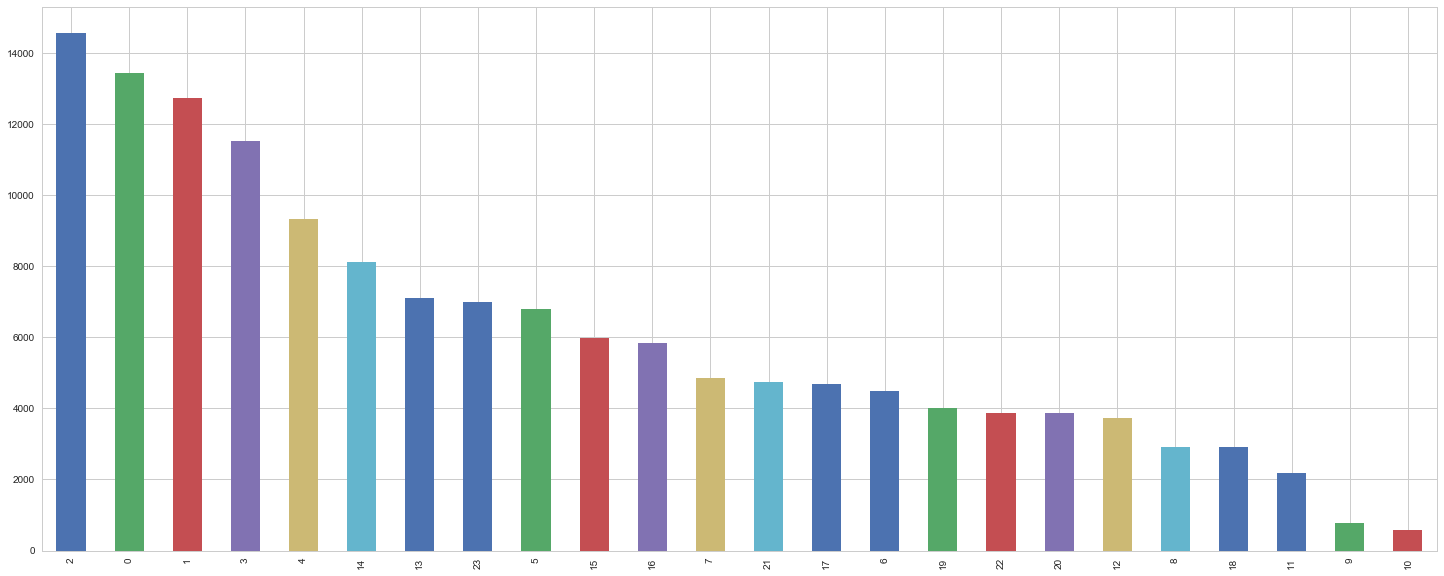

In [12]:
plt.figure(figsize=(25,10))
train.UNIX_TIMESTAMP.dt.hour.value_counts().plot(kind='bar')

I could see most of the requests are made post midnight

In [13]:
train.UNIX_TIMESTAMP.dt.hour.value_counts(normalize=True).sort_values(ascending=False)

2     0.0997645029
0     0.0919602393
1     0.0871749935
3     0.0788435998
4     0.0638511987
14    0.0556361844
13    0.0485849638
23    0.0478045374
5     0.0465449019
15    0.0409723839
16    0.0400413489
7     0.0332434246
21    0.0325451483
17    0.0320796309
6     0.0307652286
19    0.0274655312
22    0.0265961088
20    0.0265550338
12    0.0254939277
8     0.0199830223
18    0.0199830223
11    0.0149855553
9     0.0052233799
10    0.0039021318
Name: UNIX_TIMESTAMP, dtype: float64

I hypothesise that most of the CACHE_RESULT_CODE = MISS would be ouccuring during this period due to heavy traffic

In [14]:
pd.crosstab(train.UNIX_TIMESTAMP.dt.hour,train.CACHE_RESULT_CODE).sort_values('TCP-MISS',ascending=False)

CACHE_RESULT_CODE,TCP-HIT,TCP-MISS
UNIX_TIMESTAMP,,
2,2992,11581
1,2047,10687
0,3471,9962
3,1845,9672
14,1768,6359
4,3019,6308
13,1533,5564
5,1262,5537
23,1724,5259


Now, intresting thing that i could see and cannot fathom the reason for no HIT's @ few not suspicious hour of day i.e. 7,6,18,9,10

I believe the hour of day has something to offer to our reseach i will add it as a column in the data frame 

In [15]:
train['hourOfRequest'] = train.UNIX_TIMESTAMP.dt.hour

let's see if we have some pattern with the Day of week althought, we have only two days data but it could have also been quite a good feature

In [16]:
train.UNIX_TIMESTAMP.dt.day.value_counts(normalize=True)

11    0.9998356997
12    0.0001643003
Name: UNIX_TIMESTAMP, dtype: float64

it seems the data set actually have majority of data from 11th December 2017

In [17]:
print("min timestamp from 12th request := ",min(train[train.UNIX_TIMESTAMP.dt.day==12].UNIX_TIMESTAMP))
print("max timestamp from 12th request := ",max(train[train.UNIX_TIMESTAMP.dt.day==12].UNIX_TIMESTAMP))

min timestamp from 12th request :=  2017-12-12 00:00:00
max timestamp from 12th request :=  2017-12-12 00:00:06


I want to remove the records for 12th date as it won't contribute much in our clustering analysis let's analysis them first before rejecting them

In [18]:
train[(train.UNIX_TIMESTAMP.dt.day==12)]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest
13301,137017891,2017-12-12 00:00:00,3750109,TCP-MISS,74.0,1513036800000,0
13302,137017891,2017-12-12 00:00:00,3815078,TCP-MISS,91.0,1513036800000,0
45950,2917860722,2017-12-12 00:00:05,3702626,TCP-HIT,138.0,1513036805000,0
45951,2917860722,2017-12-12 00:00:05,3749402,TCP-HIT,193.0,1513036805000,0
51739,2917872454,2017-12-12 00:00:02,3714031,TCP-HIT,26.0,1513036802000,0
67725,2917873537,2017-12-12 00:00:03,3717932,TCP-MISS,64.0,1513036803000,0
75277,2917876253,2017-12-12 00:00:04,3983691,TCP-HIT,41.0,1513036804000,0
75278,2917876253,2017-12-12 00:00:05,3714031,TCP-HIT,22.0,1513036805000,0
78778,2917876499,2017-12-12 00:00:04,3749402,TCP-MISS,61.0,1513036804000,0
78779,2917876499,2017-12-12 00:00:04,3702626,TCP-MISS,87.0,1513036804000,0


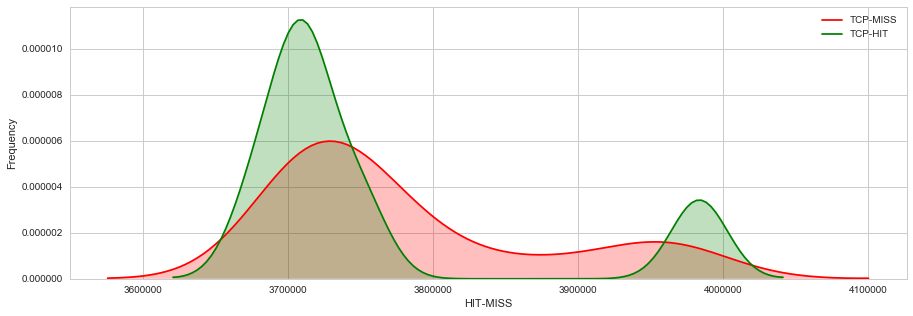

In [19]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==12)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==12)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

it means as the size of the packets increase the chances of being MISS increases but its just 24 records and we can't assume that.

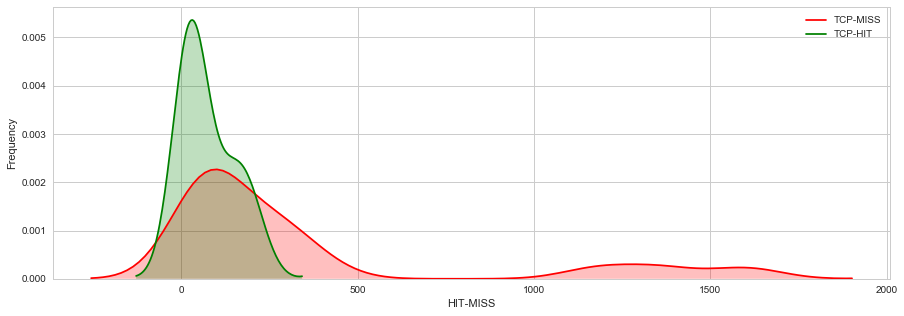

In [20]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==12)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==12
                                                                                       )], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

Let analysis the 11th day of month.

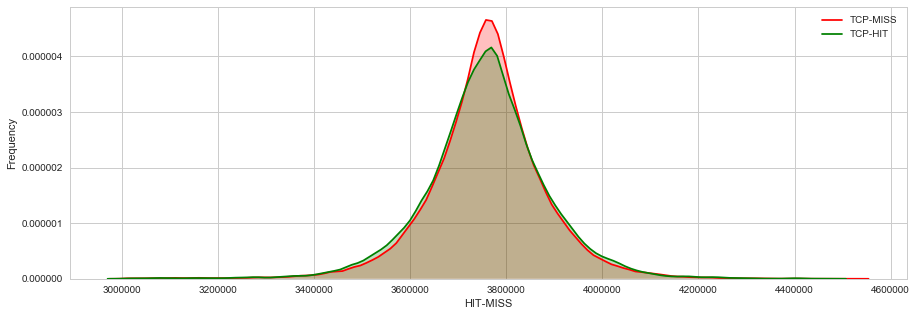

In [21]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

looking at the density plot for the 11th day of month it seems that due to such few records the pattern is showing two bumps in 12th day

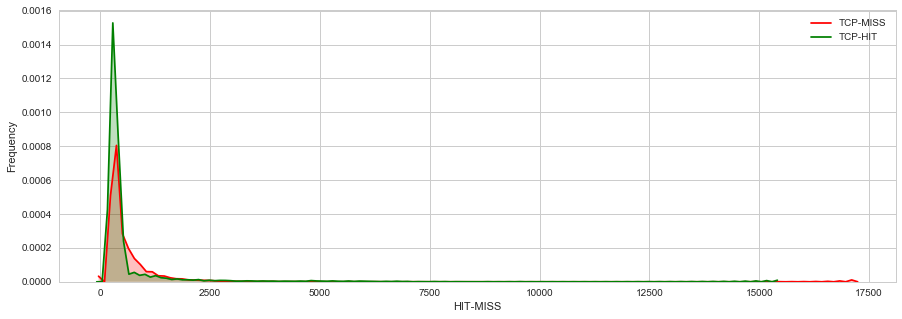

In [22]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11
                                                                                       )], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

Now, looking at both the days I think that 12th date data wouldn't help much in terms of a distinct representation of the pattern so i take a judgement call to drop them

In [23]:
train = train[train.UNIX_TIMESTAMP.dt.day==11]

As per Objective 2

In [24]:
train = train.sort_values(['USER_ID','UNIX_TIMESTAMP'])

In [25]:
train['sessionDiff'] = train.timeInMilliSecond.diff()

In [26]:
train.head(10)

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,NaN
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,1512950418000,0,1000.0
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,1512950435000,0,17000.0
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,1512950437000,0,2000.0
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,1512950453000,0,16000.0
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0,1512996394000,12,45941000.0
6,137015810,2017-12-11 12:46:35,3938262,TCP-MISS,585.0,1512996395000,12,1000.0
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0,1512996395000,12,0.0
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0,1512996399000,12,4000.0
9,137015810,2017-12-11 12:46:43,3711227,TCP-MISS,477.0,1512996403000,12,4000.0


every new user will have its first difference as NaN so converting it to 0

In [27]:
train.ix[0,'sessionDiff'] = 0.0

In [28]:
train.loc[train.index.isin(train[train.USER_ID.duplicated()==False].index.tolist()),['sessionDiff']] = -9999

In [29]:
train[train.USER_ID.duplicated()==False]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0
1335,137015815,2017-12-11 00:18:16,3580420,TCP-MISS,60.0,1512951496000,0,-9999.0
3754,137015856,2017-12-11 13:23:40,3806473,TCP-HIT,676.0,1512998620000,13,-9999.0
5597,137015916,2017-12-11 00:00:03,3640853,TCP-MISS,72.0,1512950403000,0,-9999.0
7311,137015982,2017-12-11 04:20:36,3803977,TCP-MISS,419.0,1512966036000,4,-9999.0
7454,137015993,2017-12-11 01:21:10,3725599,TCP-MISS,579.0,1512955270000,1,-9999.0
9158,137016210,2017-12-11 00:00:03,3985415,TCP-MISS,81.0,1512950403000,0,-9999.0
12355,137017891,2017-12-11 00:00:03,3609845,TCP-MISS,61.0,1512950403000,0,-9999.0
13303,137018146,2017-12-11 02:36:48,3758019,TCP-MISS,578.0,1512959808000,2,-9999.0
13888,137019219,2017-12-11 00:00:06,3694505,TCP-MISS,335.0,1512950406000,0,-9999.0


In [30]:
train.sessionDiff.describe()

count    1.4605000000e+05
mean     1.9461760151e+04
std      7.4691735712e+05
min     -9.9990000000e+03
25%      0.0000000000e+00
50%      1.0000000000e+03
75%      1.5000000000e+04
max      7.4697000000e+07
Name: sessionDiff, dtype: float64

In [31]:
train[train.sessionDiff.duplicated()==False]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,1512950418000,0,1000.0
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,1512950435000,0,17000.0
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,1512950437000,0,2000.0
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,1512950453000,0,16000.0
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0,1512996394000,12,45941000.0
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0,1512996395000,12,0.0
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0,1512996399000,12,4000.0
10,137015810,2017-12-11 12:47:01,3864928,TCP-HIT,508.0,1512996421000,12,18000.0
27,137015810,2017-12-11 12:48:38,3723129,TCP-MISS,420.0,1512996518000,12,6000.0


In [32]:
train.groupby(['USER_ID'],as_index=False).agg({"UNIX_TIMESTAMP":['min','max']}).sort_values("USER_ID")

USER_ID      UNIX_TIMESTAMP                    
                               min                 max
0    137015810 2017-12-11 00:00:17 2017-12-11 14:59:31
1    137015815 2017-12-11 00:18:16 2017-12-11 23:59:51
2    137015856 2017-12-11 13:23:40 2017-12-11 16:27:24
3    137015916 2017-12-11 00:00:03 2017-12-11 05:09:34
4    137015982 2017-12-11 04:20:36 2017-12-11 04:31:09
5    137015993 2017-12-11 01:21:10 2017-12-11 23:28:01
6    137016210 2017-12-11 00:00:03 2017-12-11 05:13:16
7    137017891 2017-12-11 00:00:03 2017-12-11 23:59:59
8    137018146 2017-12-11 02:36:48 2017-12-11 03:40:29
9    137019219 2017-12-11 00:00:06 2017-12-11 23:59:53
10   393938811 2017-12-11 03:52:45 2017-12-11 06:24:57
11   646729730 2017-12-11 04:25:32 2017-12-11 17:48:45
12  1227473978 2017-12-11 01:11:56 2017-12-11 01:47:42
13  1237151447 2017-12-11 00:18:18 2017-12-11 06:23:30
14  1239371932 2017-12-11 00:17:40 2017-12-11 01:00:55
15  1611194429 2017-12-11 00:00:10 2017-12-11 01:14:39
16  1657993075 2017-12-11 04:41:07 2017-12-11 07:55:14
17  1728454917 2017-12-11 06:59:51 2017-12-11 16:00:48
18  1733381647 2017-12-11 07:24:49 2017-12-11 09:30:57
19  1733381923 2017-12-11 06:09:34 2017-12-11 12:53:50
20  2812331953 2017-12-11 00:00:06 2017-12-11 20:55:11
21  2812331957 2017-12-11 01:45:59 2017-12-11 23:50:31
22  2812332300 2017-12-11 13:19:23 2017-12-11 18:04:37
23  2812335216 2017-12-11 00:00:10 2017-12-11 06:42:16
24  2917860096 2017-12-11 01:52:15 2017-12-11 03:29:46
25  2917860209 2017-12-11 13:45:24 2017-12-11 17:45:26
26  2917860712 2017-12-11 01:05:56 2017-12-11 06:01:40
27  2917860722 2017-12-11 00:00:10 2017-12-11 23:59:48
28  2917866112 2017-12-11 00:00:17 2017-12-11 04:05:55
29  2917872454 2017-12-11 03:06:20 2017-12-11 23:59:57
30  2917872477 2017-12-11 13:48:06 2017-12-11 22:01:43
31  2917873266 2017-12-11 00:00:07 2017-12-11 05:07:34
32  2917873281 2017-12-11 01:08:54 2017-12-11 01:49:03
33  2917873296 2017-12-11 20:15:15 2017-12-11 23:59:54
34  2917873352 2017-12-11 03:16:54 2017-12-11 04:29:18
35  2917873372 2017-12-11 00:00:26 2017-12-11 08:14:03
36  2917873537 2017-12-11 03:02:21 2017-12-11 23:59:55
37  2917873577 2017-12-11 02:22:25 2017-12-11 21:58:55
38  2917873619 2017-12-11 00:00:21 2017-12-11 11:13:14
39  2917873622 2017-12-11 02:26:05 2017-12-11 04:17:32
40  2917873641 2017-12-11 01:21:48 2017-12-11 23:59:52
41  2917876240 2017-12-11 02:00:06 2017-12-11 20:36:09
42  2917876253 2017-12-11 00:00:04 2017-12-11 23:59:59
43  2917876259 2017-12-11 00:00:25 2017-12-11 13:47:27
44  2917876499 2017-12-11 00:31:17 2017-12-11 23:59:46
45  2917876560 2017-12-11 12:30:10 2017-12-11 13:11:58
46  2917877364 2017-12-11 00:07:14 2017-12-11 16:40:24
47  2917877497 2017-12-11 01:55:58 2017-12-11 03:59:18
48  2917877573 2017-12-11 00:00:14 2017-12-11 01:59:23
49  2917877688 2017-12-11 14:00:37 2017-12-11 22:42:08
50  2917877811 2017-12-11 00:00:07 2017-12-11 15:07:46
51  2917877816 2017-12-11 00:00:06 2017-12-11 23:59:59
52  2917877900 2017-12-11 07:17:36 2017-12-11 22:22:00
53  2917877999 2017-12-11 00:00:10 2017-12-11 19:02:51
54  2917892300 2017-12-11 00:16:03 2017-12-11 23:59:54
55  2917892399 2017-12-11 00:01:32 2017-12-11 23:59:59
56  2917894201 2017-12-11 04:05:44 2017-12-11 05:50:52
57  2917895266 2017-12-11 00:00:19 2017-12-11 21:51:57
58  2917895289 2017-12-11 02:20:05 2017-12-11 02:28:41
59  2917895623 2017-12-11 00:00:04 2017-12-11 23:59:52
60  2917896018 2017-12-11 00:30:54 2017-12-11 03:22:00
61  2917897235 2017-12-11 00:00:12 2017-12-11 23:59:46
62  2917897262 2017-12-11 02:33:57 2017-12-11 23:59:56
63  2917897272 2017-12-11 12:55:25 2017-12-11 22:00:18
64  2917897782 2017-12-11 03:35:10 2017-12-11 08:48:08
65  2917899510 2017-12-11 01:55:48 2017-12-11 02:21:53
66  2917899811 2017-12-11 00:00:10 2017-12-11 13:43:36
67  2917899974 2017-12-11 11:31:50 2017-12-11 12:00:35
68  2917899985 2017-12-11 00:35:03 2017-12-11 23:59:32
69  3495690191 2017-12-11 00:00:04 2017-12-11 23:59:59

In [33]:
train[train.USER_ID==137015810].sort_values(by="UNIX_TIMESTAMP")

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,1512950418000,0,1000.0
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,1512950435000,0,17000.0
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,1512950437000,0,2000.0
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,1512950453000,0,16000.0
5,137015810,2017-12-11 12:46:34,3762661,TCP-HIT,590.0,1512996394000,12,45941000.0
6,137015810,2017-12-11 12:46:35,3938262,TCP-MISS,585.0,1512996395000,12,1000.0
7,137015810,2017-12-11 12:46:35,3588735,TCP-MISS,562.0,1512996395000,12,0.0
8,137015810,2017-12-11 12:46:39,3655776,TCP-MISS,788.0,1512996399000,12,4000.0
9,137015810,2017-12-11 12:46:43,3711227,TCP-MISS,477.0,1512996403000,12,4000.0


### RESPONSE_SIZE ###

In [34]:
train.RESPONSE_SIZE.describe()

count    1.4605000000e+05
mean     3.7597603159e+06
std      1.2289704192e+05
min      3.0024570000e+06
25%      3.6967892500e+06
50%      3.7614370000e+06
75%      3.8247710000e+06
max      4.5254340000e+06
Name: RESPONSE_SIZE, dtype: float64

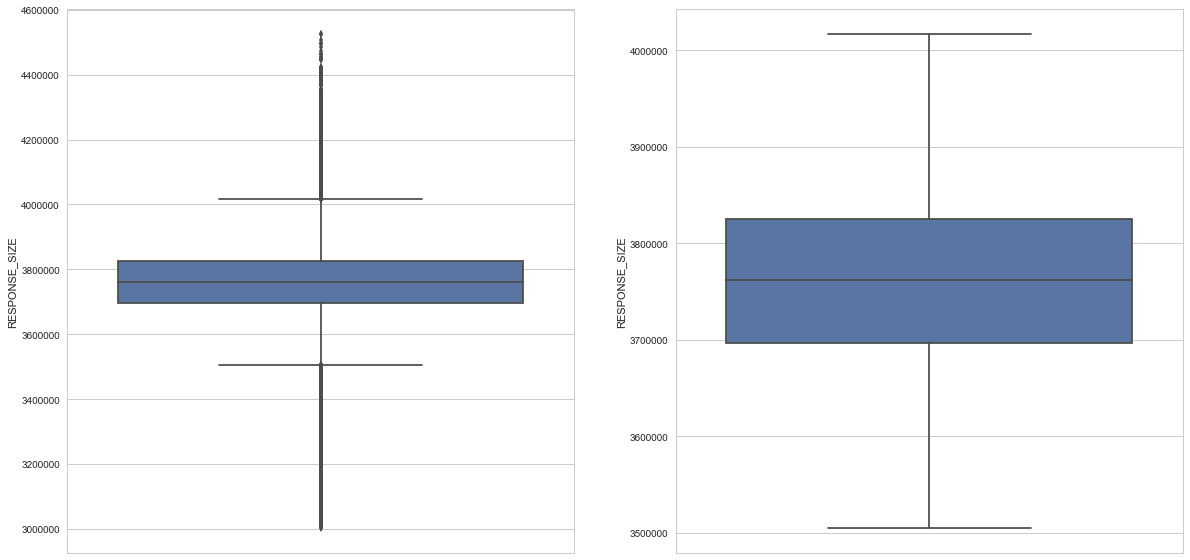

In [35]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='RESPONSE_SIZE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='RESPONSE_SIZE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

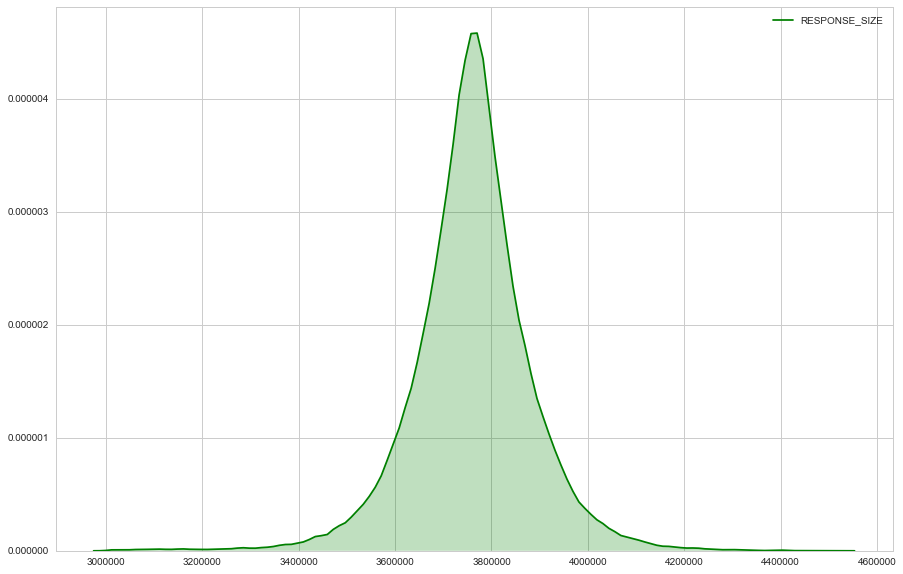

In [36]:
plt.figure(figsize=(15,10))
sns.kdeplot(train["RESPONSE_SIZE"][(train["TIME_TO_SERVER_MS"].notnull())], color="green", shade = True)

### CACHE_RESULT_CODE ###

In [37]:
train.CACHE_RESULT_CODE.value_counts(normalize=True)

TCP-MISS    0.8388291681
TCP-HIT     0.1611708319
Name: CACHE_RESULT_CODE, dtype: float64

### TIME_TO_SERVER_MS ###

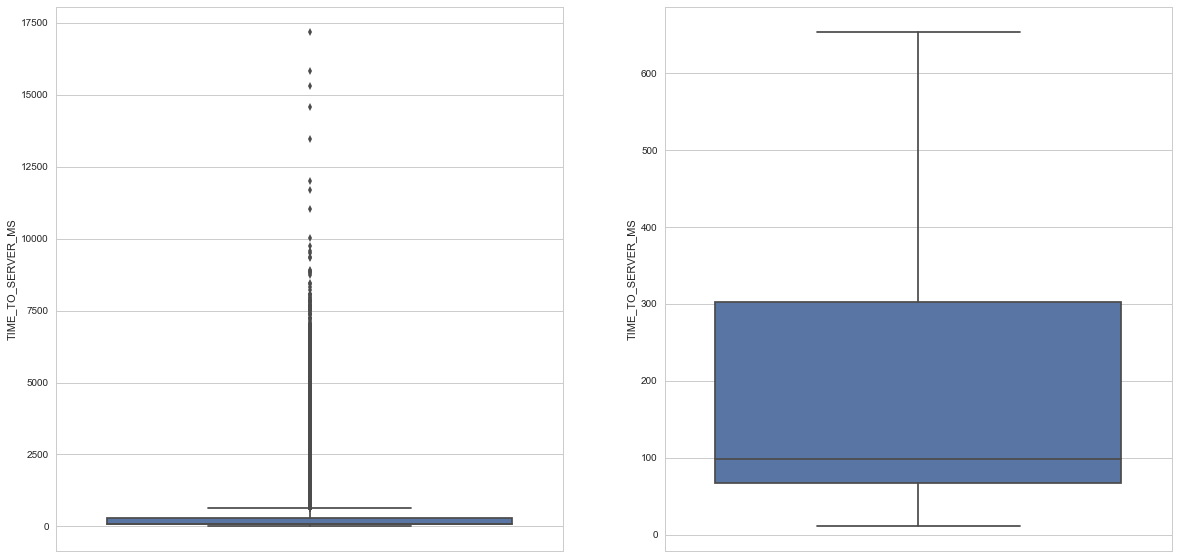

In [38]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='TIME_TO_SERVER_MS',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

The first plot shows the distribution with outliers while the second is free from outliers 

The box plot for the TIME_TO_SERVER_MS column shows that there were certainly considerable number of packets which took more than the rest to be served 

In [39]:
train.TIME_TO_SERVER_MS.describe()

count    145867.0000000000
mean        271.3653190920
std         506.5986738856
min          11.0000000000
25%          67.0000000000
50%          98.0000000000
75%         302.0000000000
max       17189.0000000000
Name: TIME_TO_SERVER_MS, dtype: float64

Due to the outlier the mean is getting skewed towards the right while the median is not impaceted.

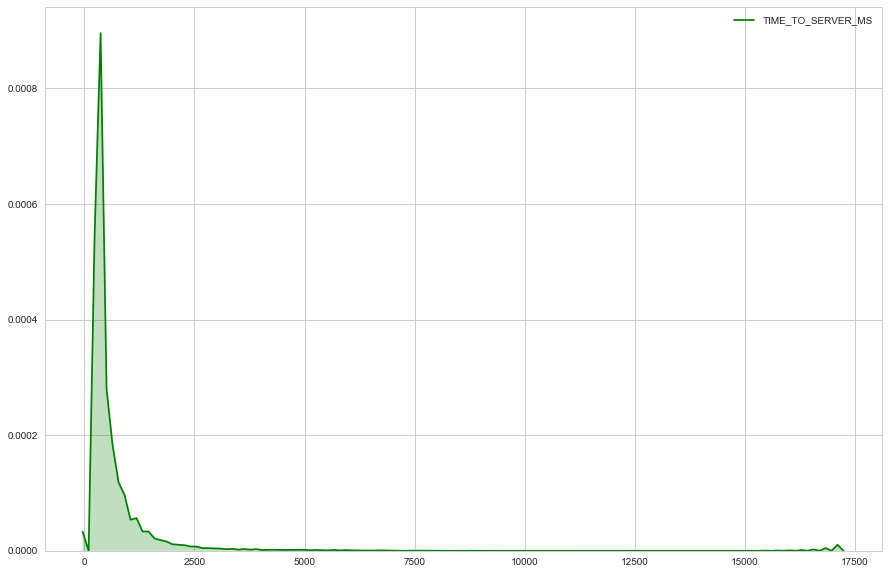

In [40]:
plt.figure(figsize=(15,10))
sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["TIME_TO_SERVER_MS"].notnull())], color="green", shade = True)

#### Misiing value imputation ####

Mising value imputation would be done considering the user session and packet size 

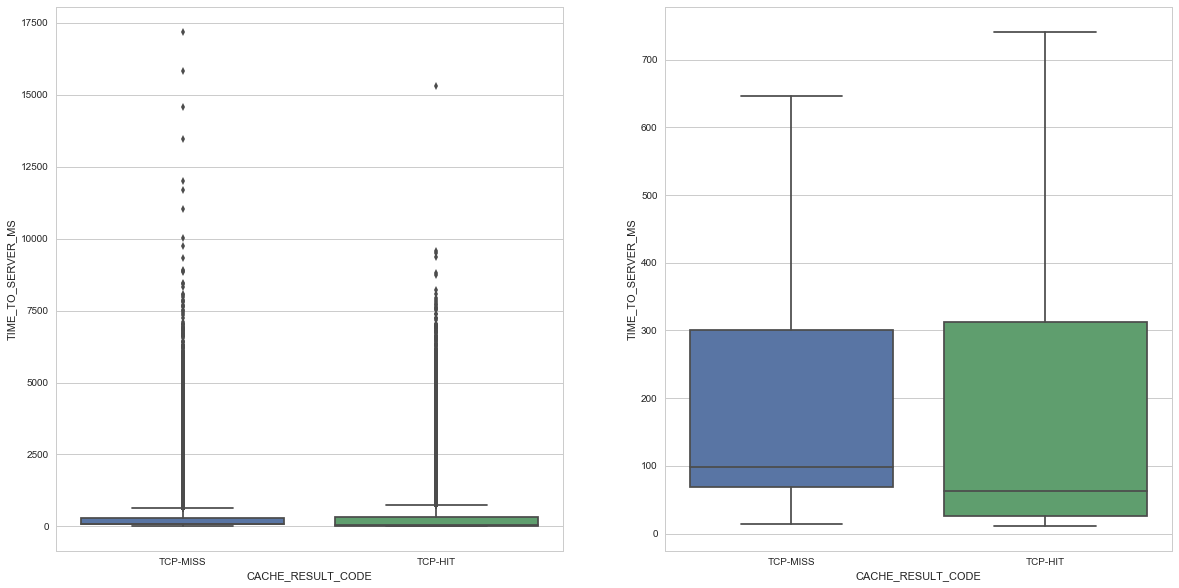

In [41]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

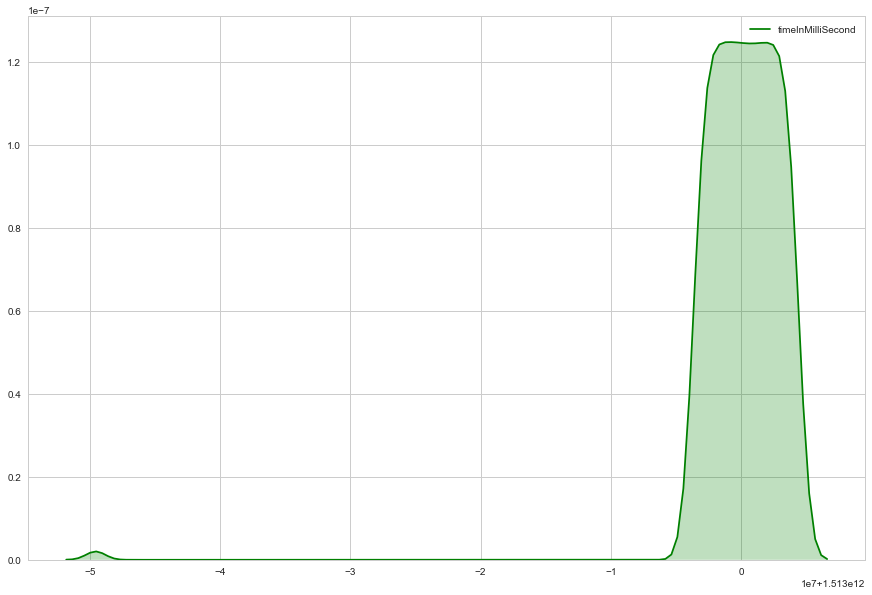

In [42]:
plt.figure(figsize=(15,10))
sns.kdeplot(train[train.USER_ID==137015810]["timeInMilliSecond"][(train["TIME_TO_SERVER_MS"].notnull())], color="green", shade = True)

In [43]:
train.head()

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,1512950418000,0,1000.0
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,1512950435000,0,17000.0
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,1512950437000,0,2000.0
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,1512950453000,0,16000.0


post discusion dropping all the missing records from the train dataframe

In [44]:
train.shape[0]-train[train.TIME_TO_SERVER_MS.notnull()].shape[0]

183

In [45]:
train = train[train.TIME_TO_SERVER_MS.notnull()]

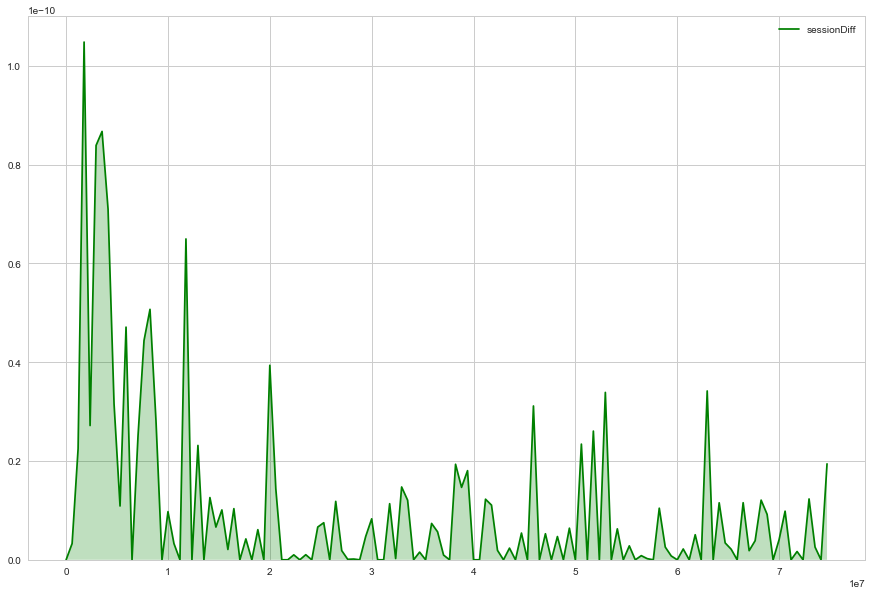

In [46]:
plt.figure(figsize=(15,10))
sns.kdeplot(train["sessionDiff"], color="green", shade = True)

### Analysis on Aggregated Scale ### 

#### Visulization of RESPONSE-SIZE and HIT-MISS ####

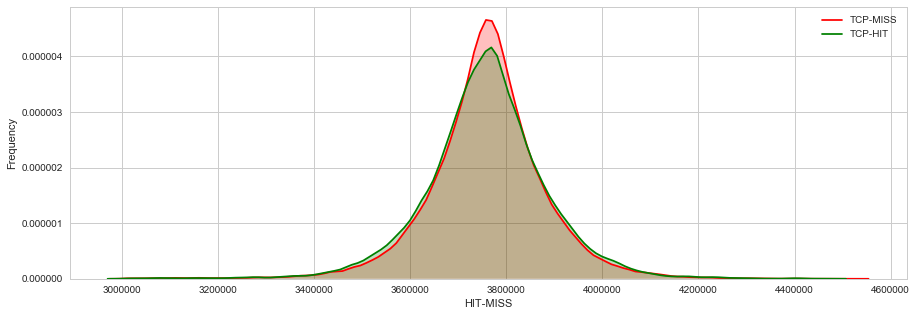

In [47]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

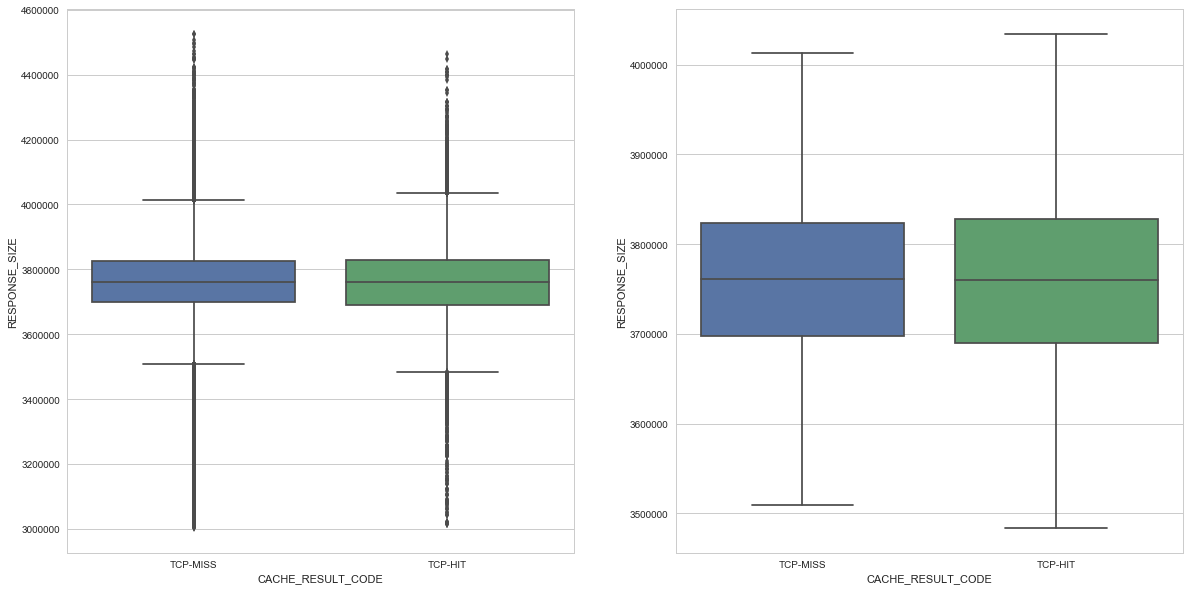

In [48]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='RESPONSE_SIZE',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='RESPONSE_SIZE',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

In [49]:
train[train.CACHE_RESULT_CODE=='TCP-MISS']["RESPONSE_SIZE"].describe(percentiles=[.10,.20,.30,.40,.50,.60,.70,.80,.90,1]).round()

count     122355.0
mean     3759989.0
std       121931.0
min      3002457.0
10%      3622074.0
20%      3679032.0
30%      3714040.0
40%      3739949.0
50%      3761661.0
60%      3783315.0
70%      3808552.0
80%      3842569.0
90%      3898782.0
100%     4525434.0
max      4525434.0
Name: RESPONSE_SIZE, dtype: float64

In [50]:
train[train.CACHE_RESULT_CODE=='TCP-HIT']["RESPONSE_SIZE"].describe(percentiles=[.10,.20,.30,.40,.50,.60,.70,.80,.90,1]).round()

count      23512.0
mean     3758446.0
std       127682.0
min      3013746.0
10%      3610904.0
20%      3670636.0
30%      3707167.0
40%      3734625.0
50%      3760282.0
60%      3783350.0
70%      3811880.0
80%      3848213.0
90%      3906768.0
100%     4463709.0
max      4463709.0
Name: RESPONSE_SIZE, dtype: float64

both the groups have a normal distribution with MISS packets having slighter prolonged tail as expected with mostly similar discriptive statistics

#### Visulization of TIME-To-SERVE and HIT-MISS ####

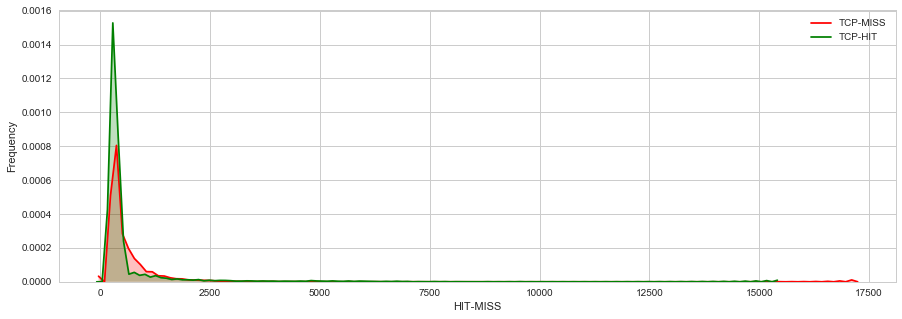

In [51]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.UNIX_TIMESTAMP.dt.day==11)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.UNIX_TIMESTAMP.dt.day==11)], ax =g, color="green", shade= True)

g.set_xlabel("HIT-MISS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

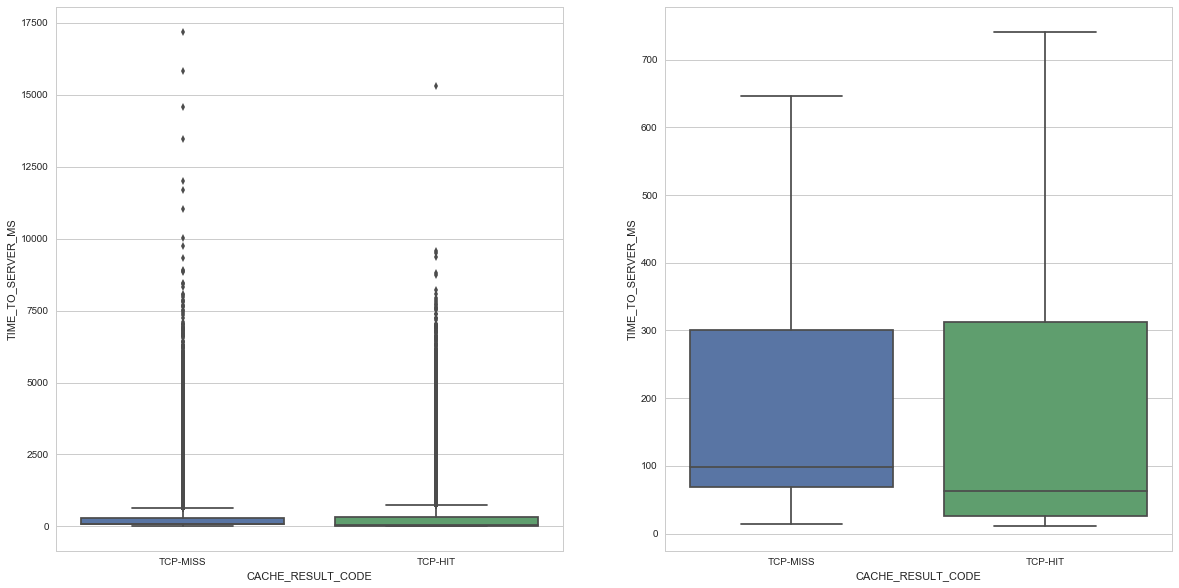

In [52]:
fig,axarr = plt.subplots(1,2,figsize=(20,10))

sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train,kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

In [53]:
train[train.CACHE_RESULT_CODE=='TCP-MISS']["TIME_TO_SERVER_MS"].describe(percentiles=[.10,.20,.30,.40,.50,.60,.70,.80,.90,1]).round()

count    122355.0
mean        269.0
std         462.0
min          14.0
10%          62.0
20%          67.0
30%          72.0
40%          81.0
50%          98.0
60%         159.0
70%         248.0
80%         358.0
90%         595.0
100%      17189.0
max       17189.0
Name: TIME_TO_SERVER_MS, dtype: float64

In [54]:
train[train.CACHE_RESULT_CODE=='TCP-HIT']["TIME_TO_SERVER_MS"].describe(percentiles=[.10,.20,.30,.40,.50,.60,.70,.80,.90,1]).round()

count    23512.0
mean       285.0
std        694.0
min         11.0
10%         22.0
20%         25.0
30%         28.0
40%         33.0
50%         63.0
60%        195.0
70%        282.0
80%        351.0
90%        456.0
100%     15324.0
max      15324.0
Name: TIME_TO_SERVER_MS, dtype: float64

1. mean of HIT is on a higher side with respect to the MISS because, there are some HITs where TIME_TO_SERVE was really high why ?
2. median as expected is lower for HIT and slightly higher for MISS 

#### Pair-wise Plot ####

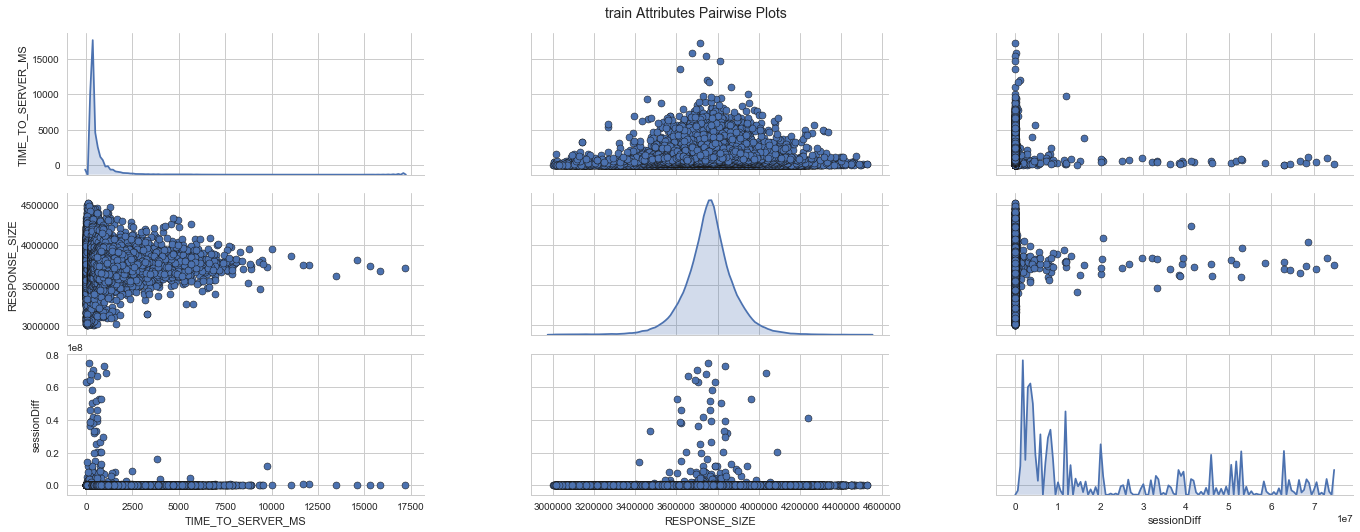

In [55]:
cols = ['TIME_TO_SERVER_MS', 'RESPONSE_SIZE', 'sessionDiff']
pp = sns.pairplot(train[cols], size=2.5, aspect=2.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('train Attributes Pairwise Plots', fontsize=14)

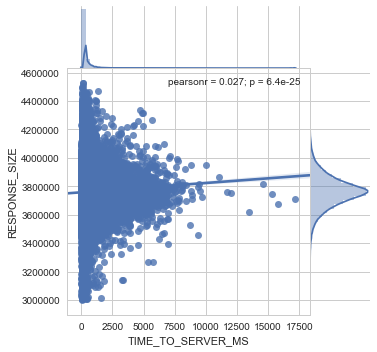

In [56]:
jp = sns.jointplot(x='TIME_TO_SERVER_MS', y='RESPONSE_SIZE', data=train,
              kind='reg', space=0, size=5, ratio=4)

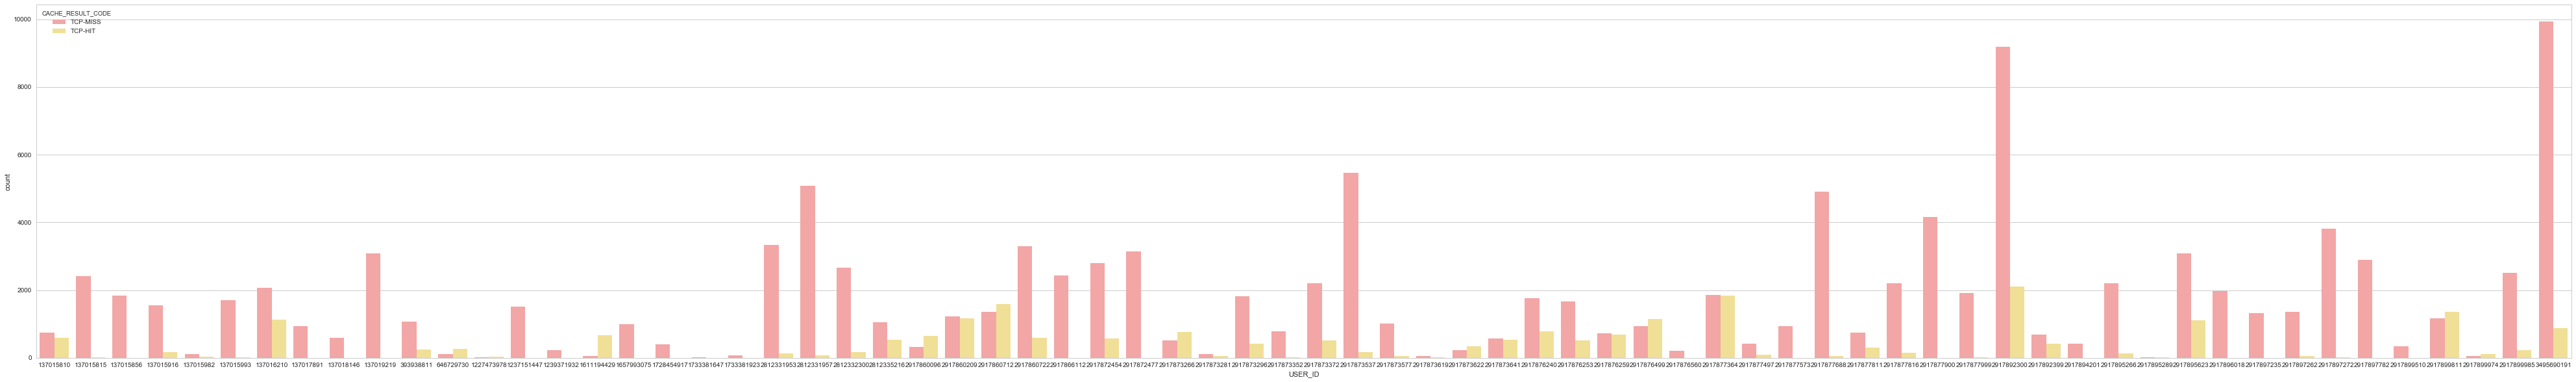

In [89]:
plt.figure(figsize=(70,10))
cp = sns.countplot(x="USER_ID", hue="CACHE_RESULT_CODE", data=train, 
                   palette={"TCP-MISS": "#FF9999", "TCP-HIT": "#FFE888"})

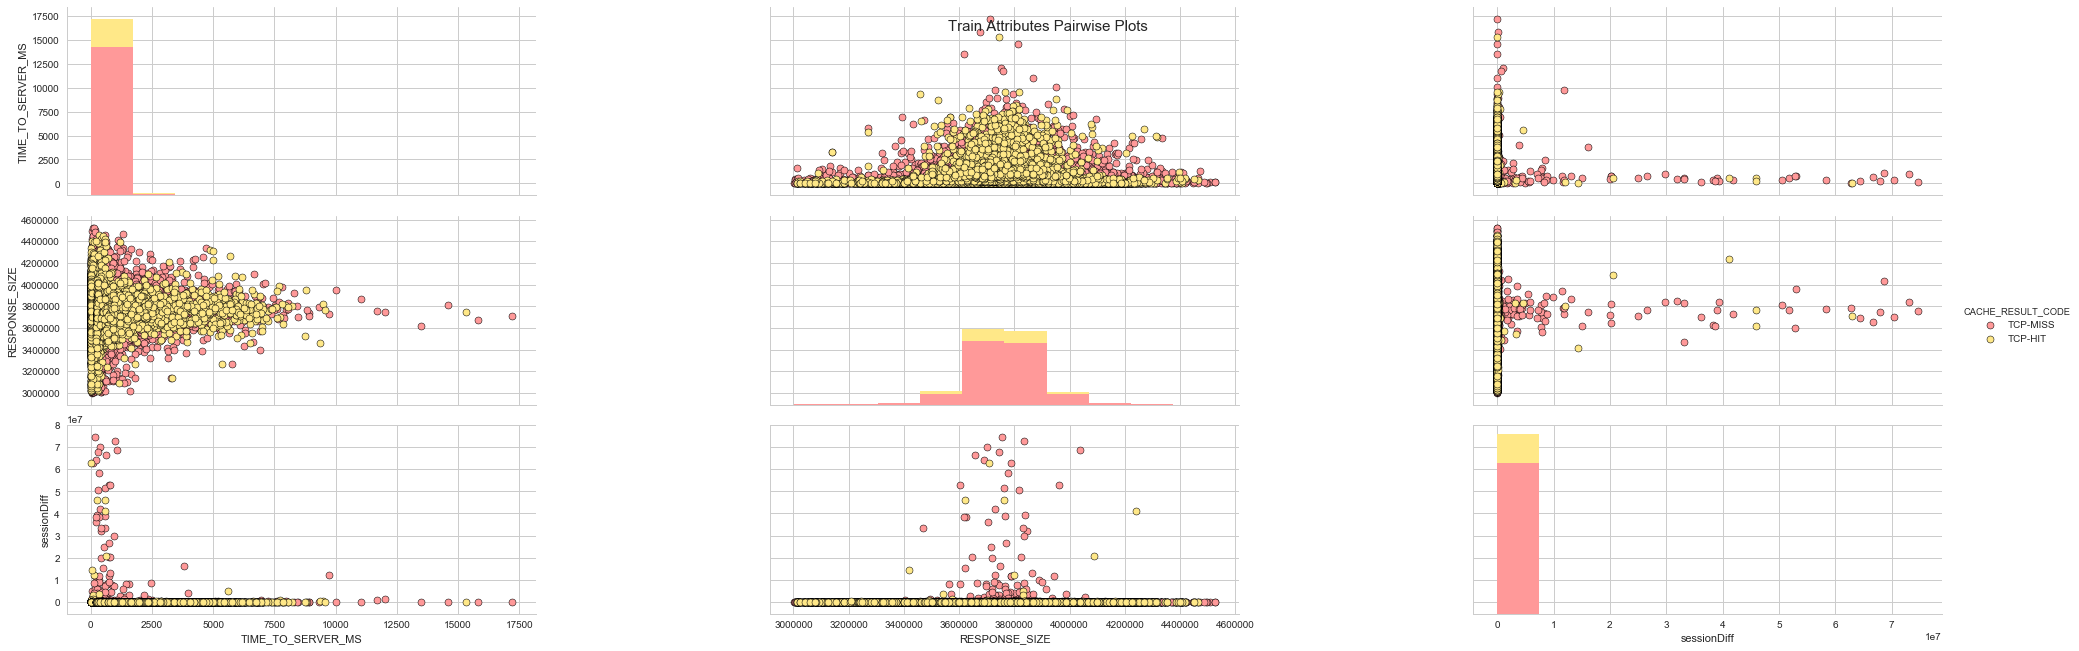

In [60]:
cols = ['TIME_TO_SERVER_MS', 'RESPONSE_SIZE', 'sessionDiff', 'CACHE_RESULT_CODE']
pp = sns.pairplot(train[cols], hue='CACHE_RESULT_CODE', size=3, aspect=3, 
                  palette={"TCP-MISS": "#FF9999", "TCP-HIT": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=1, wspace=0.5)
t = fig.suptitle('Train Attributes Pairwise Plots', fontsize=15)

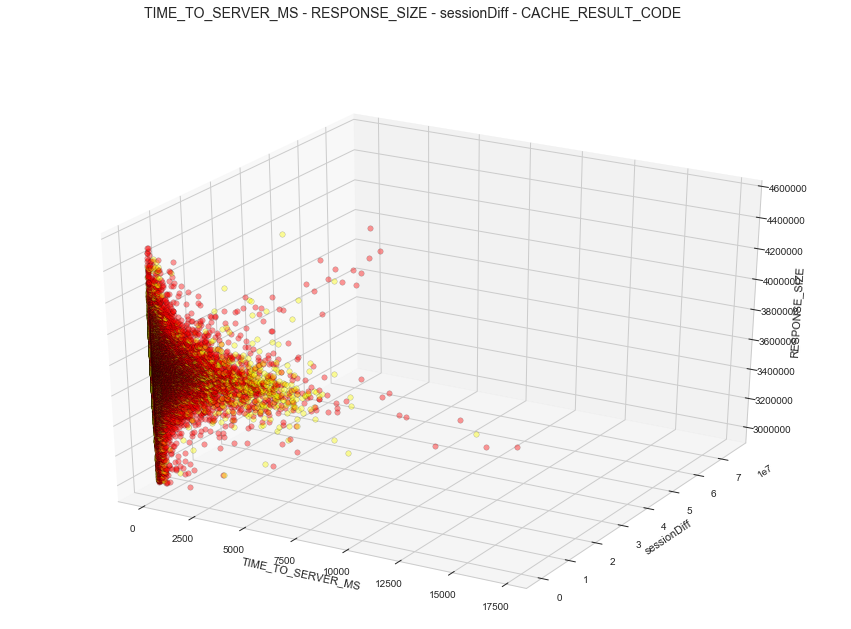

In [61]:
fig = plt.figure(figsize=(15, 10))
t = fig.suptitle('TIME_TO_SERVER_MS - RESPONSE_SIZE - sessionDiff - CACHE_RESULT_CODE', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(train['TIME_TO_SERVER_MS'])
ys = list(train['sessionDiff'])
zs = list(train['RESPONSE_SIZE'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'TCP-MISS' else 'yellow' for wt in list(train['CACHE_RESULT_CODE'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

xl = ax.set_xlabel('TIME_TO_SERVER_MS')
yl = ax.set_ylabel('sessionDiff')
zl = ax.set_zlabel('RESPONSE_SIZE')

#### Session identifier ####

In [86]:
train['sessionDiffInSec'] = train.sessionDiff/1000.0

In [88]:
train.head()

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff,sessionID,sessionDiffInSec
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0,0,-9.999
1,137015810,2017-12-11 00:00:18,3864825,TCP-MISS,331.0,1512950418000,0,1000.0,1,1.000
2,137015810,2017-12-11 00:00:35,3871134,TCP-MISS,385.0,1512950435000,0,17000.0,2,17.000
3,137015810,2017-12-11 00:00:37,3607047,TCP-MISS,279.0,1512950437000,0,2000.0,3,2.000
4,137015810,2017-12-11 00:00:53,4019151,TCP-MISS,352.0,1512950453000,0,16000.0,4,16.000


In [142]:
session = []
i = 0
for s in train.USER_ID.unique().tolist():
    i = i+1
    for k in train[train.USER_ID==s].sessionDiffInSec:
        if k <= 60:
            session.append(i)
        else :
            i = i+1
            session.append(i)

In [143]:
train["sessionID"] = session

In [144]:
len(session)

145867

In [146]:
len(train.sessionID.unique().tolist())

299

In [92]:
train.shape

(145867, 10)

In [118]:
#train[train.sessionID.duplicated()==True].head(20)
train[train.sessionDiffInSec < 0 ]

,USER_ID,UNIX_TIMESTAMP,RESPONSE_SIZE,CACHE_RESULT_CODE,TIME_TO_SERVER_MS,timeInMilliSecond,hourOfRequest,sessionDiff,sessionID,sessionDiffInSec
0,137015810,2017-12-11 00:00:17,4106686,TCP-MISS,352.0,1512950417000,0,-9999.0,0,-9.999
1335,137015815,2017-12-11 00:18:16,3580420,TCP-MISS,60.0,1512951496000,0,-9999.0,1,-9.999
3754,137015856,2017-12-11 13:23:40,3806473,TCP-HIT,676.0,1512998620000,13,-9999.0,15,-9.999
5597,137015916,2017-12-11 00:00:03,3640853,TCP-MISS,72.0,1512950403000,0,-9999.0,15,-9.999
7311,137015982,2017-12-11 04:20:36,3803977,TCP-MISS,419.0,1512966036000,4,-9999.0,16,-9.999
7454,137015993,2017-12-11 01:21:10,3725599,TCP-MISS,579.0,1512955270000,1,-9999.0,16,-9.999
9158,137016210,2017-12-11 00:00:03,3985415,TCP-MISS,81.0,1512950403000,0,-9999.0,23,-9.999
12355,137017891,2017-12-11 00:00:03,3609845,TCP-MISS,61.0,1512950403000,0,-9999.0,24,-9.999
13303,137018146,2017-12-11 02:36:48,3758019,TCP-MISS,578.0,1512959808000,2,-9999.0,26,-9.999
13888,137019219,2017-12-11 00:00:06,3694505,TCP-MISS,335.0,1512950406000,0,-9999.0,27,-9.999


In [97]:
train[train.sessionID==1].shape

(1730, 10)

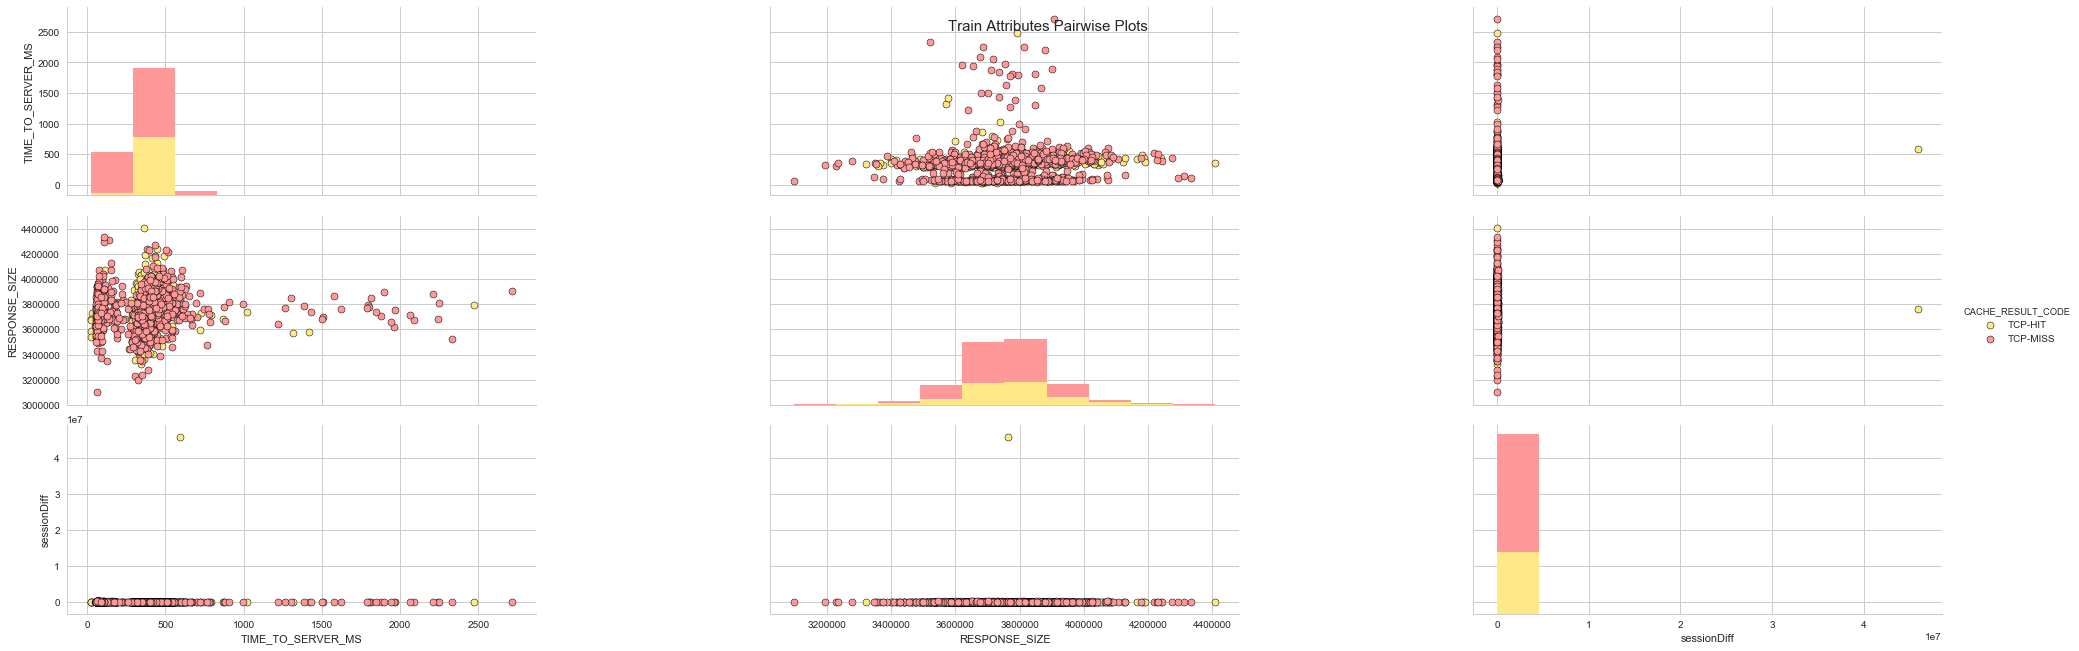

In [96]:
cols = ['TIME_TO_SERVER_MS', 'RESPONSE_SIZE', 'sessionDiff', 'CACHE_RESULT_CODE']
pp = sns.pairplot(train[train.sessionID==1][cols], hue='CACHE_RESULT_CODE', size=3, aspect=3, 
                  palette={"TCP-MISS": "#FF9999", "TCP-HIT": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=1, wspace=0.5)
t = fig.suptitle('Train Attributes Pairwise Plots', fontsize=15)

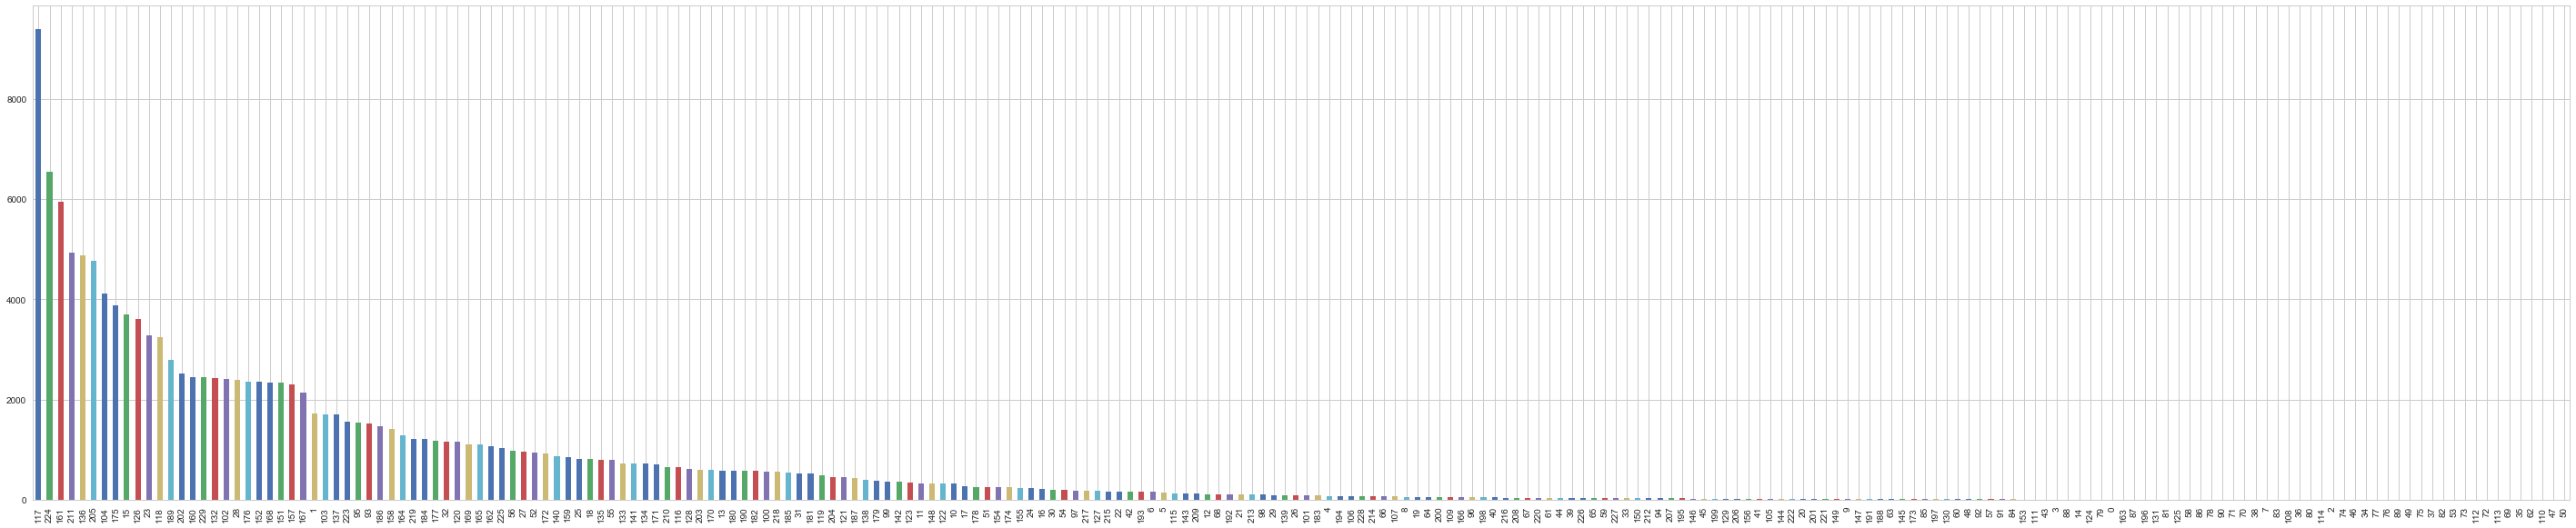

In [105]:
plt.figure(figsize=(50,10))
train.sessionID.value_counts().sort_values(ascending=False).plot(kind='bar')

In [101]:
len(train.sessionID.unique().tolist())

230

In [106]:
train.sessionID.value_counts().sort_values(ascending=False)

117    9389
224    6541
161    5941
211    4924
136    4882
205    4768
104    4113
175    3871
15     3702
126    3606
23     3278
118    3248
189    2792
202    2518
160    2455
229    2438
132    2431
102    2412
28     2390
176    2362
152    2358
168    2339
151    2330
157    2304
167    2135
1      1730
103    1710
137    1709
223    1564
95     1544
93     1513
186    1464
158    1416
164    1278
219    1222
184    1213
177    1179
32     1165
120    1156
169    1111
165    1097
162    1072
225    1041
56      980
27      957
52      946
172     930
140     871
159     852
25      821
18      812
135     801
55      788
133     724
141     721
134     717
171     706
210     653
116     646
128     608
203     606
170     596
13      588
180     581
190     577
182     572
100     565
218     560
185     547
31      519
181     517
119     495
204     457
121     444
187     425
138     406
179     388
99      364
142     356
123     337
11      328
148     324
122     319
10  

#### Aggregate ####

In [177]:
train.groupby(['sessionID','USER_ID','CACHE_RESULT_CODE'],as_index=False).agg({'TIME_TO_SERVER_MS':['max','min','mean','std','count','median'],'RESPONSE_SIZE':['max','min','mean','std','count','median'],'sessionDiffInSec':['max','min','mean','std','count','median',lambda x: max(x) - min(x)]}).round().reset_index()#.to_csv("C:/Users/sutiwari/Downloads/Cybage/Aggregated_video_sessions.csv",index=False)

index sessionID     USER_ID CACHE_RESULT_CODE TIME_TO_SERVER_MS           \
                                                                max      min   
0       0         1   137015810          TCP-MISS             385.0    279.0   
1       1         2   137015810           TCP-HIT            2475.0    268.0   
2       2         2   137015810          TCP-MISS            2713.0    273.0   
3       3         3   137015815           TCP-HIT             117.0     24.0   
4       4         3   137015815          TCP-MISS            1432.0     53.0   
5       5         4   137015815          TCP-MISS              78.0     54.0   
6       6         5   137015815          TCP-MISS              96.0     66.0   
7       7         6   137015815          TCP-MISS            1267.0     55.0   
8       8         7   137015815          TCP-MISS             901.0     56.0   
9       9         8   137015815          TCP-MISS            1182.0     55.0   
10     10         9   137015815          TCP-MISS              70.0     57.0   
11     11        10   137015815          TCP-MISS             730.0     40.0   
12     12        11   137015815          TCP-MISS             123.0     44.0   
13     13        12   137015815          TCP-MISS             312.0     38.0   
14     14        13   137015815          TCP-MISS             318.0     33.0   
15     15        14   137015815          TCP-MISS             323.0     38.0   
16     16        15   137015815          TCP-MISS            1554.0     35.0   
17     17        16   137015815          TCP-MISS             203.0     70.0   
18     18        17   137015815          TCP-MISS            1138.0     32.0   
19     19        18   137015856           TCP-HIT            1152.0     20.0   
20     20        18   137015856          TCP-MISS            3098.0     42.0   
21     21        19   137015916           TCP-HIT             124.0     19.0   
22     22        19   137015916          TCP-MISS            1539.0     48.0   
23     23        20   137015916          TCP-MISS             423.0     54.0   
24     24        21   137015982           TCP-HIT             499.0    220.0   
25     25        21   137015982          TCP-MISS             720.0    215.0   
26     26        22   137015993           TCP-HIT             505.0    425.0   
27     27        22   137015993          TCP-MISS             841.0    354.0   
28     28        23   137015993          TCP-MISS             871.0    299.0   
29     29        24   137015993          TCP-MISS             721.0    282.0   
30     30        25   137015993          TCP-MISS             689.0    325.0   
31     31        26   137015993          TCP-MISS             564.0    310.0   
32     32        27   137015993          TCP-MISS             727.0    305.0   
33     33        28   137015993          TCP-MISS             641.0    299.0   
34     34        29   137015993           TCP-HIT             539.0    378.0   
35     35        29   137015993          TCP-MISS             869.0    314.0   
36     36        30   137016210           TCP-HIT            3811.0     14.0   
37     37        30   137016210          TCP-MISS            1561.0     23.0   
38     38        31   137016210           TCP-HIT            2826.0     15.0   
39     39        31   137016210          TCP-MISS             323.0     54.0   
40     40        32   137017891          TCP-MISS             264.0     50.0   
41     41        33   137017891          TCP-MISS            3451.0     47.0   
42     42        34   137017891          TCP-MISS             977.0     57.0   
43     43        35   137018146          TCP-MISS             578.0     51.0   
44     44        36   137018146          TCP-MISS            7530.0     34.0   
45     45        37   137019219          TCP-MISS             861.0     54.0   
46     46        38   137019219           TCP-HIT             254.0    219.0   
47     47        38   137019219          TCP-MISS            2163.0     54.0   
48  

In [178]:
groupedTrain = train.groupby(['sessionID','USER_ID','CACHE_RESULT_CODE'],as_index=False).agg({'TIME_TO_SERVER_MS':['max','min','mean','std','count','median'],'RESPONSE_SIZE':['max','min','mean','std','count','median'],'sessionDiffInSec':['max','min','mean','std','count','median',lambda x: max(x) - min(x)]}).round().reset_index()

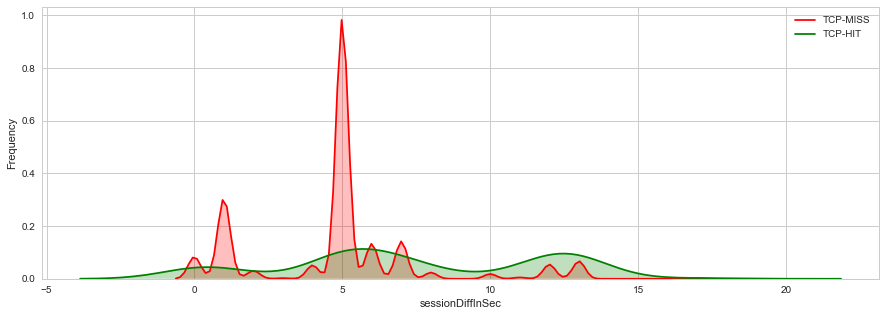

In [163]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["sessionDiffInSec"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.sessionID==2) & (train.sessionDiffInSec < 100)], color="Red", shade = True)
g = sns.kdeplot(train["sessionDiffInSec"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.sessionID==2)& (train.sessionDiffInSec < 100)], ax =g, color="green", shade= True)

g.set_xlabel("sessionDiffInSec")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

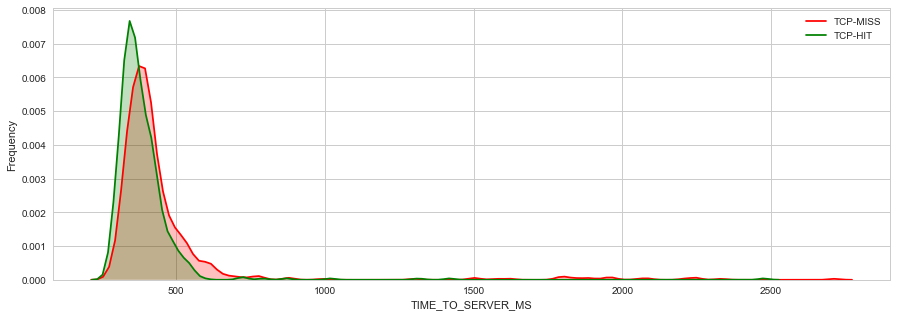

In [165]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.sessionID==2)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.sessionID==2)], ax =g, color="green", shade= True)

g.set_xlabel("TIME_TO_SERVER_MS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

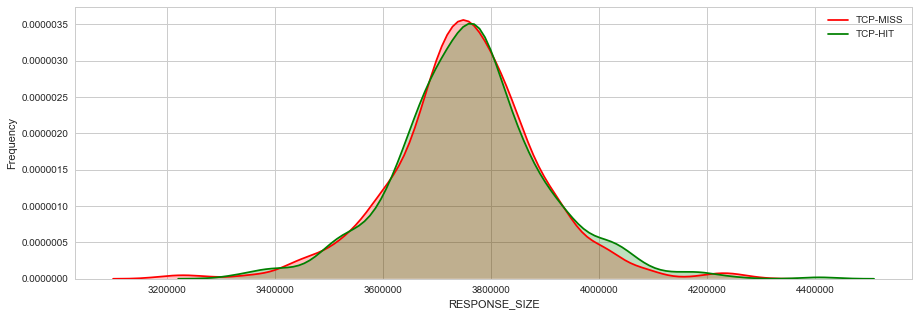

In [164]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.sessionID==2)], color="Red", shade = True)
g = sns.kdeplot(train["RESPONSE_SIZE"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.sessionID==2)], ax =g, color="green", shade= True)

g.set_xlabel("RESPONSE_SIZE")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

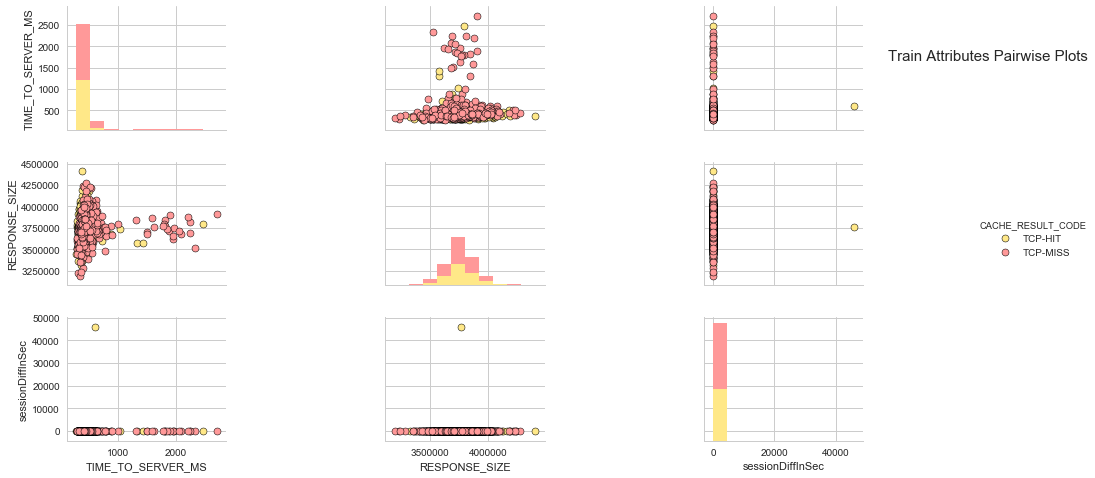

In [159]:
cols = ['TIME_TO_SERVER_MS', 'RESPONSE_SIZE', 'sessionDiffInSec', 'CACHE_RESULT_CODE']
pp = sns.pairplot(train[train.sessionID==2][cols], hue='CACHE_RESULT_CODE', size=2, aspect=2, 
                  palette={"TCP-MISS": "#FF9999", "TCP-HIT": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=1.1, wspace=1)
t = fig.suptitle('Train Attributes Pairwise Plots', fontsize=15,x=1,y=1)

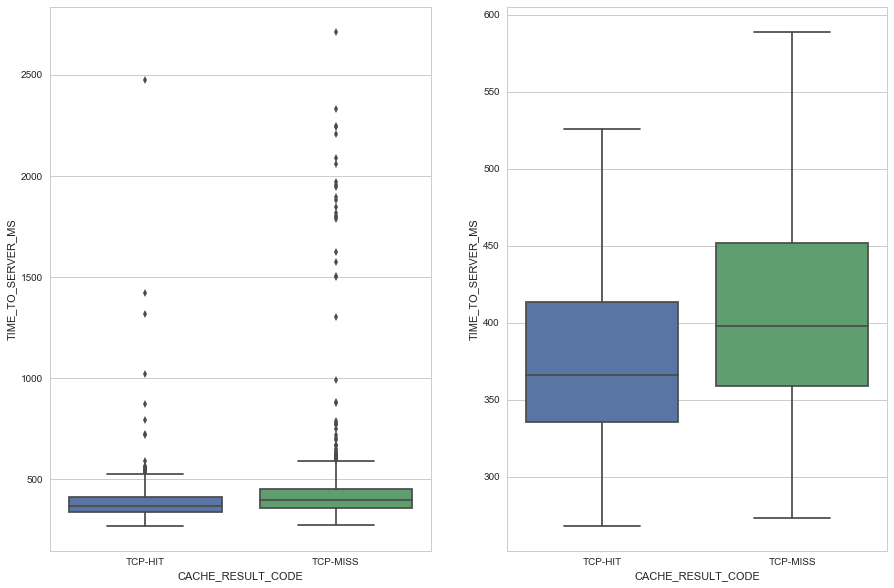

In [167]:
fig,axarr = plt.subplots(1,2,figsize=(15,10))

sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train[train.sessionID==2],kind='box',size=15,aspect=.4,showfliers=True,ax=axarr[0])
sns.factorplot(y='TIME_TO_SERVER_MS',x='CACHE_RESULT_CODE',data=train[train.sessionID==2],kind='box',size=15,aspect=.4,showfliers=False,ax=axarr[1])
plt.close(2)
plt.close(3)

In [168]:
train[train.sessionID==2].CACHE_RESULT_CODE.value_counts()

TCP-MISS    739
TCP-HIT     591
Name: CACHE_RESULT_CODE, dtype: int64

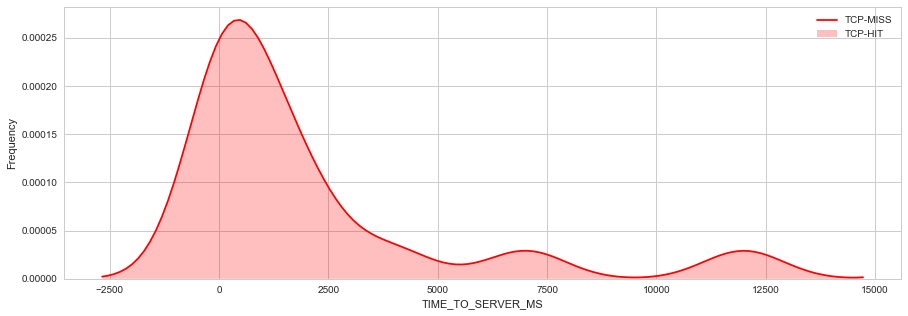

In [170]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-MISS') & (train.USER_ID==1733381647)], color="Red", shade = True)
g = sns.kdeplot(train["TIME_TO_SERVER_MS"][(train["CACHE_RESULT_CODE"] == 'TCP-HIT') & (train.USER_ID==1733381647)], ax =g, color="green", shade= True)

g.set_xlabel("TIME_TO_SERVER_MS")
g.set_ylabel("Frequency")
g = g.legend(["TCP-MISS","TCP-HIT"])

In [171]:
train[train.USER_ID==1733381647]['CACHE_RESULT_CODE'].value_counts()

TCP-MISS    15
Name: CACHE_RESULT_CODE, dtype: int64

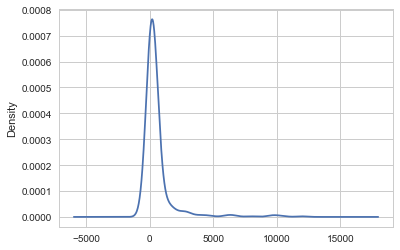

In [183]:
groupedTrain.TIME_TO_SERVER_MS['mean'].plot(kind='kde')